In [2908]:
#import library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2909]:
dataset = pd.read_csv (r"diabetes_data_upload.csv")
dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [2910]:
df=dataset

In [2911]:
dataset.shape

(520, 17)

In [2912]:
dataset.dtypes 

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [2913]:
dataset.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [2914]:
dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


Data Cleaning

In [2915]:
dataset = dataset.drop_duplicates()

In [2916]:
dataset.shape

(251, 17)

In [2917]:
dataset.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [2918]:
for i in dataset:
    print(f'{i} : {dataset[i].unique()}')

Age : [40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]
Gender : ['Male' 'Female']
Polyuria : ['No' 'Yes']
Polydipsia : ['Yes' 'No']
sudden weight loss : ['No' 'Yes']
weakness : ['Yes' 'No']
Polyphagia : ['No' 'Yes']
Genital thrush : ['No' 'Yes']
visual blurring : ['No' 'Yes']
Itching : ['Yes' 'No']
Irritability : ['No' 'Yes']
delayed healing : ['Yes' 'No']
partial paresis : ['No' 'Yes']
muscle stiffness : ['Yes' 'No']
Alopecia : ['Yes' 'No']
Obesity : ['Yes' 'No']
class : ['Positive' 'Negative']


Exploratory data analysis (EDA)

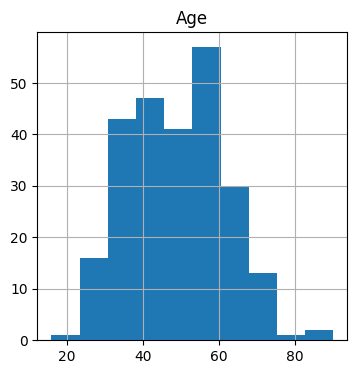

In [2919]:
dataset.hist(figsize=(4,4))
plt.show()

In [2920]:
dataset.describe(include='object')

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,No,No,Positive
freq,160,132,127,147,159,134,184,140,127,180,126,139,153,161,207,173


<Axes: xlabel='class', ylabel='count'>

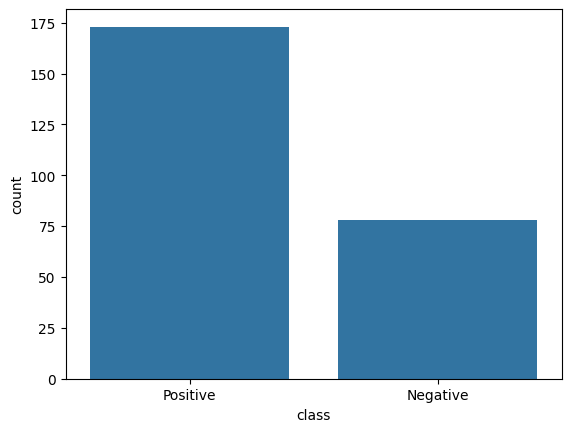

In [2921]:
sns.countplot(data=dataset, x='class')

<Axes: xlabel='class', ylabel='Age'>

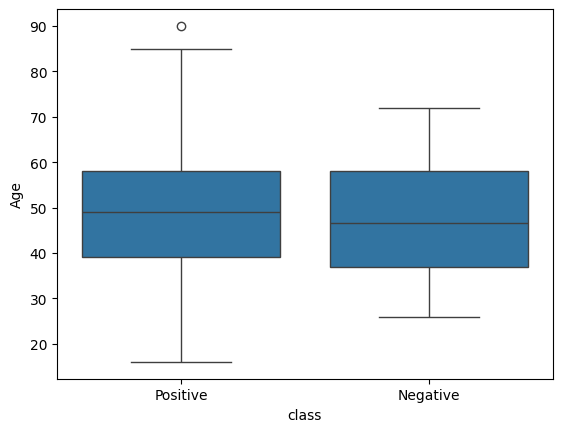

In [2922]:
sns.boxplot(x="class", y="Age", data=dataset)

<Axes: xlabel='visual blurring', ylabel='Age'>

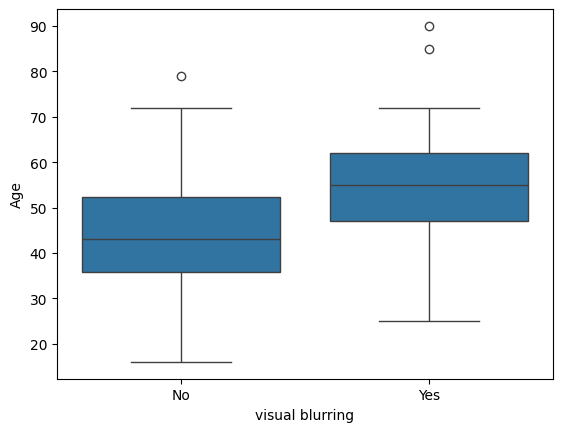

In [2923]:
sns.boxplot(x="visual blurring", y="Age", data=dataset)

<Axes: xlabel='Obesity', ylabel='Age'>

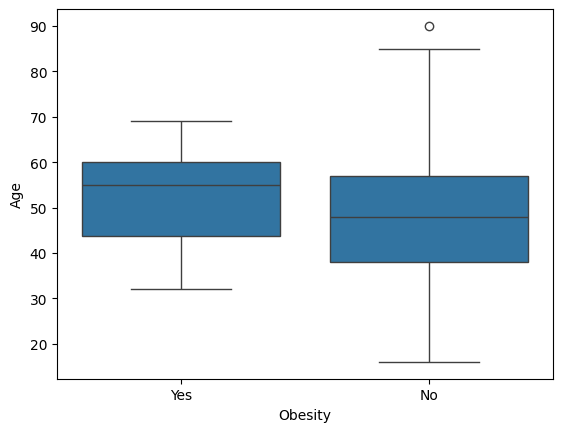

In [2924]:
sns.boxplot(x="Obesity", y="Age", data=dataset)

<Axes: xlabel='Irritability', ylabel='Age'>

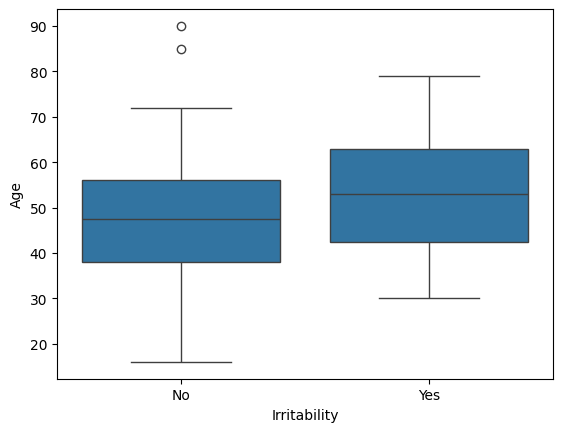

In [2925]:
sns.boxplot(x="Irritability", y="Age", data=dataset)

<Axes: xlabel='muscle stiffness', ylabel='Age'>

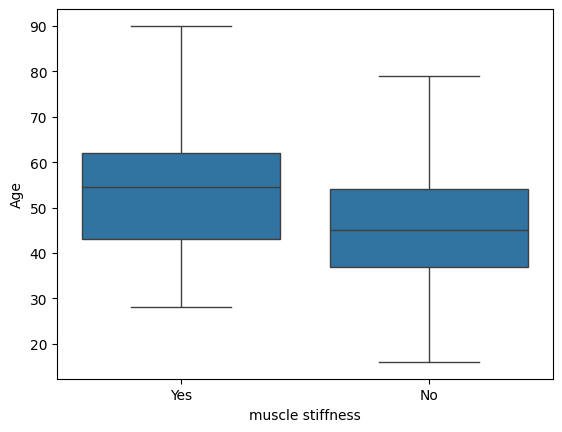

In [2926]:
sns.boxplot(x="muscle stiffness", y="Age", data=dataset)

<Axes: xlabel='sudden weight loss', ylabel='count'>

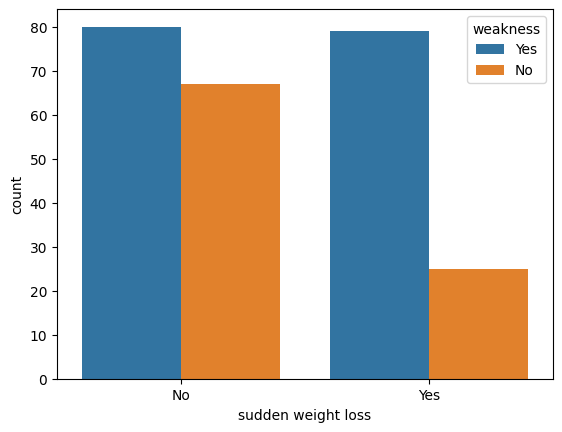

In [2927]:
sns.countplot(data=dataset, x="sudden weight loss", hue="weakness")

<Axes: xlabel='weakness', ylabel='count'>

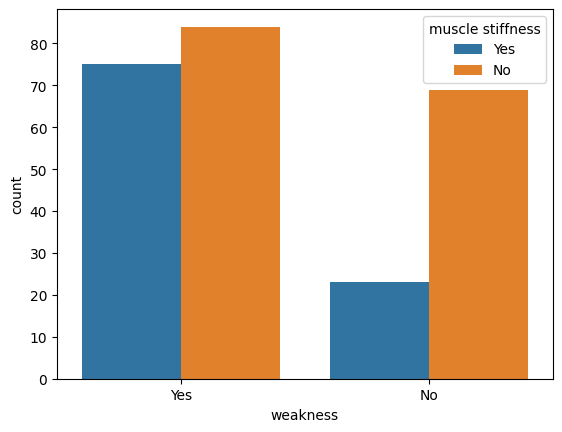

In [2928]:
sns.countplot(data=dataset, x="weakness", hue="muscle stiffness")

<Axes: xlabel='Polydipsia', ylabel='count'>

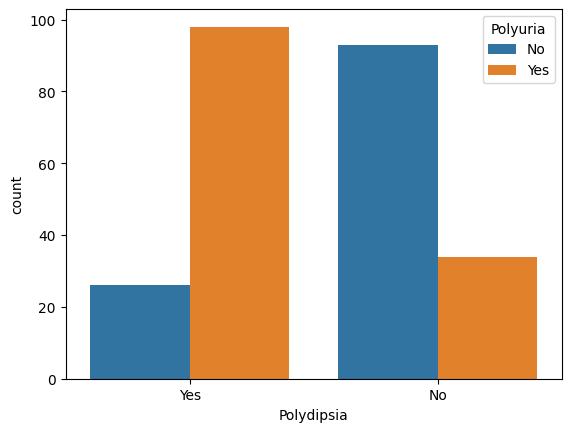

In [2929]:
sns.countplot(data=dataset, x="Polydipsia", hue="Polyuria")

<Axes: xlabel='Obesity', ylabel='count'>

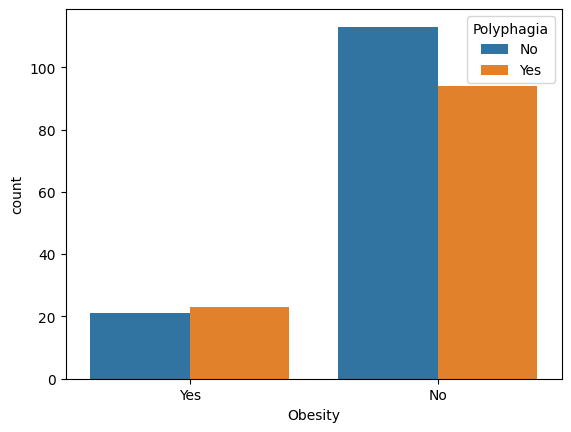

In [2930]:
sns.countplot(data=dataset, x="Obesity", hue="Polyphagia")

<Axes: xlabel='Obesity', ylabel='count'>

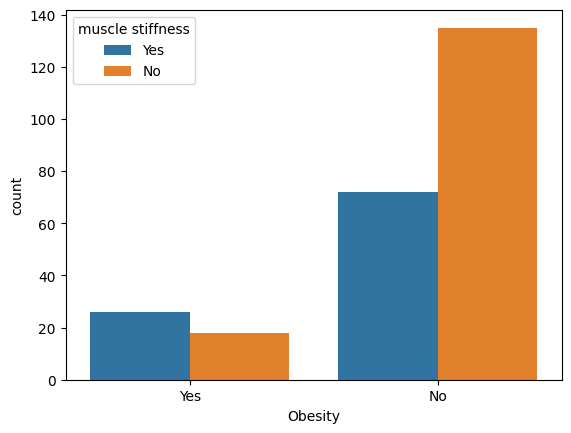

In [2931]:
sns.countplot(data=dataset, x="Obesity", hue="muscle stiffness")

<Axes: xlabel='Genital thrush', ylabel='count'>

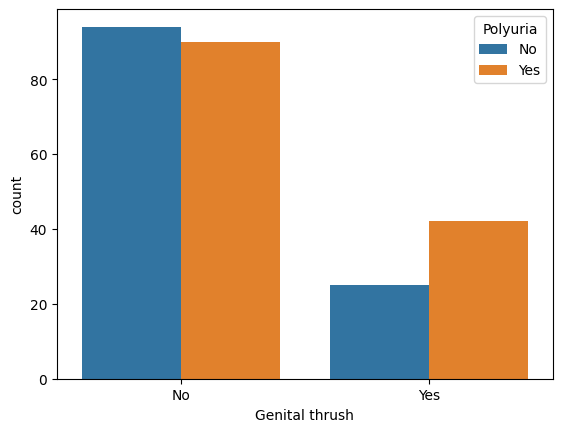

In [2932]:
sns.countplot(data=dataset, x="Genital thrush", hue="Polyuria")

<Axes: xlabel='partial paresis', ylabel='count'>

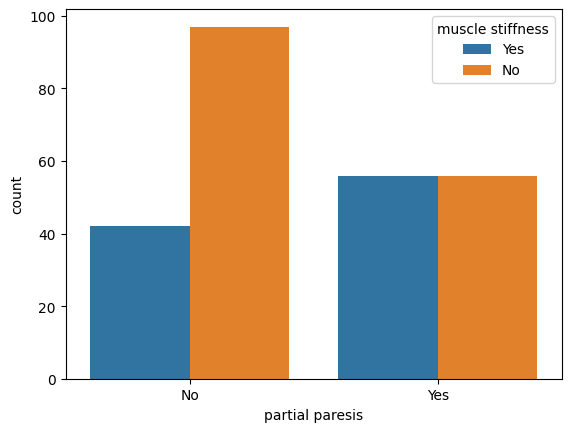

In [2933]:
sns.countplot(data=dataset, x="partial paresis", hue="muscle stiffness")

<Axes: xlabel='delayed healing', ylabel='count'>

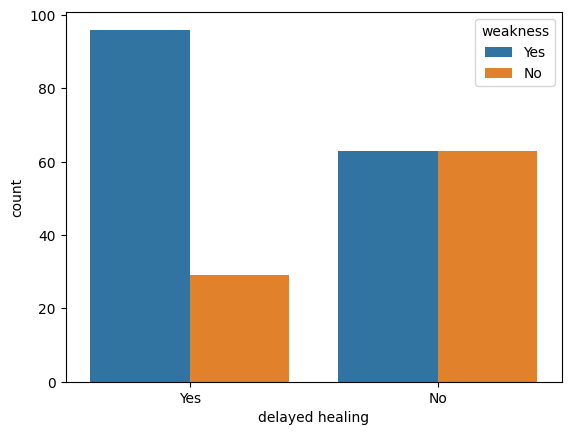

In [2934]:
sns.countplot(data=dataset, x="delayed healing", hue="weakness")

<Axes: xlabel='delayed healing', ylabel='count'>

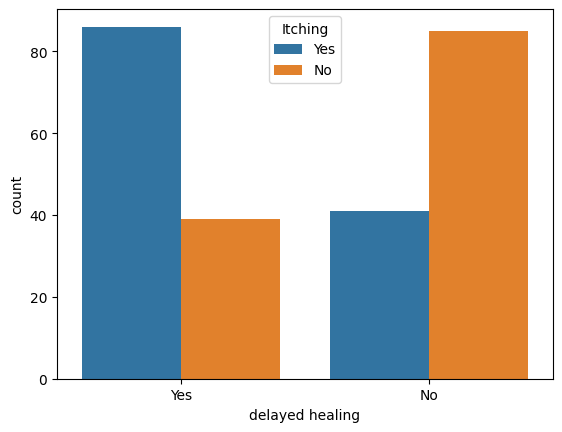

In [2935]:
sns.countplot(data=dataset, x="delayed healing", hue="Itching")

<Axes: xlabel='Age', ylabel='Obesity'>

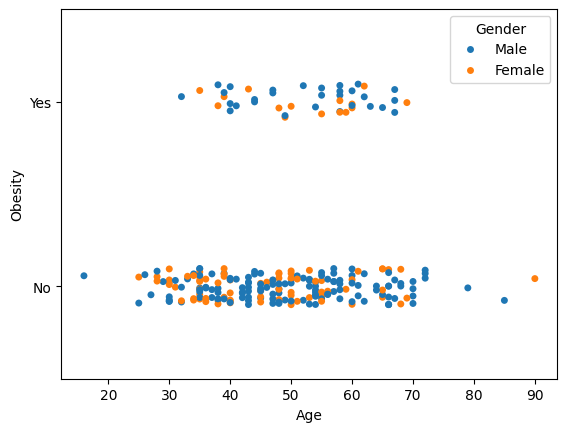

In [2936]:
sns.stripplot(data=dataset, x="Age", y="Obesity", hue="Gender")

<Axes: xlabel='Age', ylabel='Polyuria'>

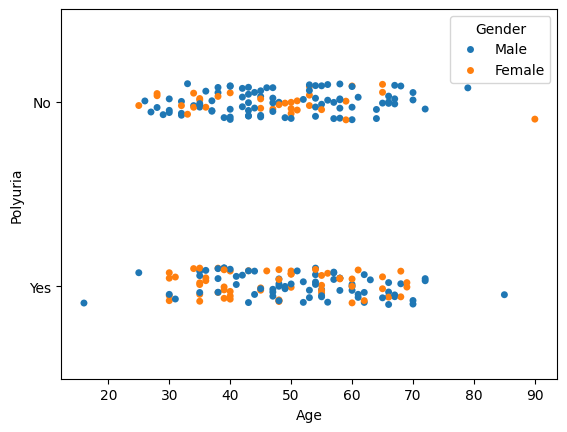

In [2937]:
sns.stripplot(data=dataset, x="Age", y="Polyuria", hue="Gender")

Label Encoding

In [2938]:
#split the categorical data and numerical data
numerical_features = []
categorical_features = []

for i in dataset.columns:
    if dataset[i].nunique()>2:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [2939]:
from sklearn.preprocessing import LabelEncoder
dataset[categorical_features] = dataset[categorical_features].apply(lambda series: pd.Series(LabelEncoder().fit_transform(series), index = series.index))
dataset

C:\Users\kahwei\AppData\Local\Temp\ipykernel_6944\1176463391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[categorical_features] = dataset[categorical_features].apply(lambda series: pd.Series(LabelEncoder().fit_transform(series), index = series.index))


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [2940]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(dataset)
dataset = pd.DataFrame(X_scaled, columns = dataset.columns)

dataset


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0.324324,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,0.567568,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.337838,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,0.391892,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.594595,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.310811,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
247,0.432432,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
248,0.567568,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
249,0.216216,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [2941]:
y_label = dataset['class']
dataset = dataset.drop(["class"], axis = 1)
dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0.324324,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,0.567568,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.337838,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.391892,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.594595,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.310811,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
247,0.432432,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
248,0.567568,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
249,0.216216,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


Feature Selection

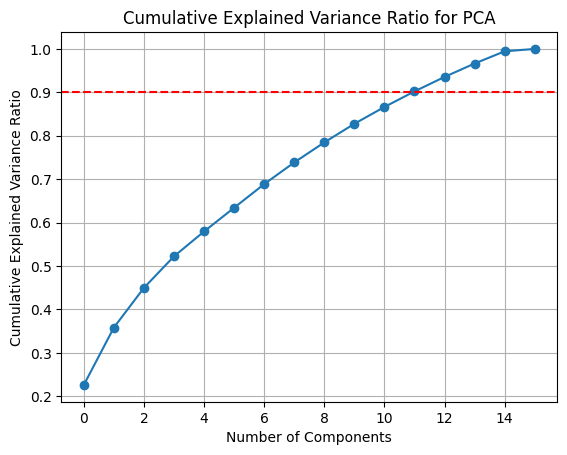

In [2942]:
pca = PCA().fit(dataset)

plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio for PCA')
plt.axhline(y = 0.90, color = 'r', linestyle = '--')
plt.grid(True)
plt.show()

In [2943]:
# Create a PCA object with the desired number of components
pca = PCA(n_components = 11)

# Fit the PCA model to the data
pca_features = pca.fit_transform(dataset)

# Access the principal components
components = pca.components_

# Access the explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_


# Print the results
print("Original shape:", dataset.shape)
print("Transformed shape:", pca_features.shape)
print("Principal components:")
print(components)
print("Explained variance ratio:")
print(explained_variance_ratio)

Original shape: (251, 16)
Transformed shape: (251, 11)
Principal components:
[[ 0.05977101 -0.19438883  0.37243195  0.38695191  0.25242676  0.25918546
   0.34754979  0.00368276  0.2968086   0.19828584  0.14740657  0.23272026
   0.36056014  0.27650495 -0.07014586  0.06183208]
 [ 0.0925006   0.32929233 -0.15904669 -0.17152428 -0.24096298  0.16967885
   0.01708521  0.18906091  0.12824788  0.41215525  0.09871977  0.40740926
  -0.16555981  0.21306427  0.51879074  0.03749851]
 [-0.01171731  0.32594827  0.33357437  0.21302211  0.30220322 -0.01395967
  -0.01039024  0.52795226 -0.38177693 -0.16506102  0.34486325 -0.03980547
  -0.17893075 -0.15060029  0.11103255  0.07789845]
 [ 0.05610665  0.25593381  0.05325523 -0.01435501 -0.31271728 -0.38290543
   0.33880141 -0.14044202  0.20602731 -0.33038664  0.3393545  -0.31206869
   0.03466555  0.36966834  0.09631052  0.19520679]
 [ 0.04104861  0.16552978 -0.16682147  0.07938703  0.30502891  0.42007364
  -0.36798185 -0.06683341  0.26614072  0.03677938 -0.

Clustering

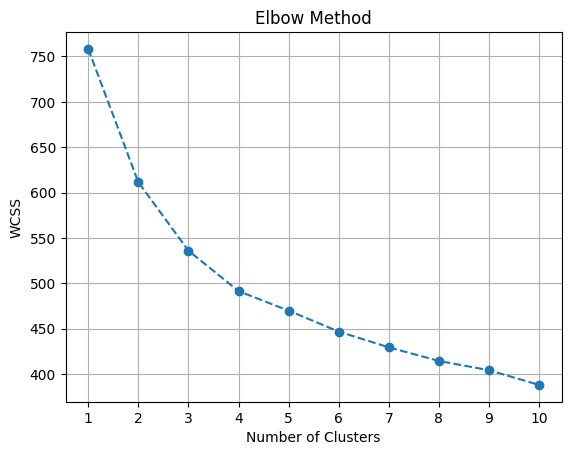

In [2944]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

In [2945]:
# Create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters = 4, random_state = 1)

# Fit the KMeans model to the data
kmeans.fit(pca_features)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_

# Print the results
print("Cluster labels:")
print(labels)
print("Cluster centers:")
print(cluster_centers)


Cluster labels:
[2 3 2 2 0 2 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 3 3 1 3 0 1 0 2 1 0 0 3
 0 3 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 3 3 1 1 1 1 1 3 3 1 1 3 1 3 1 3 1
 1 1 1 1 1 1 3 3 1 1 3 1 3 1 3 3 1 1 1 1 1 1 1 3 1 0 1 0 0 0 0 0 1 0 1 2 0
 0 0 1 1 1 1 1 1 0 0 0 2 3 1 0 0 0 0 0 3 0 3 3 2 2 0 0 2 3 0 3 3 1 0 0 3 3
 0 0 0 0 0 0 3 0 0 0 3 3 2 0 3 3 3 3 1 1 3 3 3 3 2 3 2 2 3 3 3 3 3 3 3 3 2
 3 3 2 3 2 2 3 3 3 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 2 2 2 3 3 2 3 3 3 2 3 2
 0 3 2 2 3 3 2 2 2 2 0 3 2 3 3 2 3 2 3 2 2 3 1 1 1 1 1 2 3]
Cluster centers:
[[ 0.34190701  0.32534894  0.68077069  0.0677895   0.05103838 -0.10037383
  -0.04648068  0.06418581 -0.05676068 -0.01751539 -0.07630717]
 [ 0.96774519 -0.43973481 -0.20381654 -0.15108915 -0.04963947  0.01863604
  -0.05289925 -0.06361157  0.0188449   0.01608544  0.02051171]
 [-0.31507368  0.98455211 -0.33784736 -0.16059145 -0.01594139  0.06022545
   0.07454253  0.04233465  0.02848779 -0.00477873  0.0709766 ]
 [-0.92410888 -0.43220581 -0.10227148  0.18369

c:\Users\kahwei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


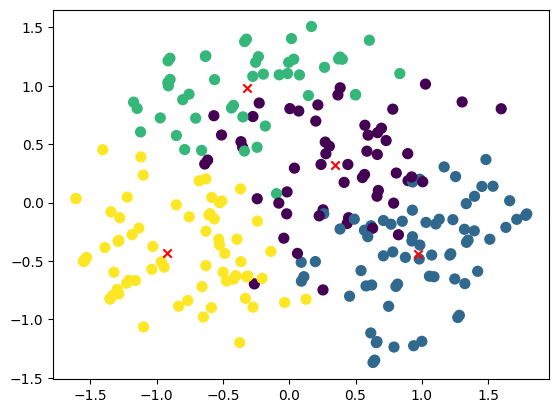

In [2946]:
plt.scatter(pca_features[:,0], pca_features[:,1], s = 50, c = labels, cmap='viridis') 
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', label='Cluster Centroids')
plt.show()

In [2947]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
silhouette_avg = silhouette_score(pca_features, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.18485283934761246
